<a href="https://colab.research.google.com/github/MatheusSC017/Studies/blob/main/BinaryTreeBuilder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamental classes

In [1]:
class Node:
  left_node = None
  right_node = None
  def __init__(self, key):
    self.key = key

# Helpers

In [2]:
from networkx.drawing.nx_pydot import graphviz_layout
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
def print_tree(tree):
  def print_node(root, prev=None, color=None):
    if root:
      G.add_node(root.key)
      if prev:
        G.add_edge(prev, root.key, color=color)
      print_node(root.left_node, root.key, '#00FF00')
      print_node(root.right_node, root.key, '#FF0000')
  plt.figure(1, figsize=(20, 8))
  G = nx.Graph()
  print_node(tree)
  pos = graphviz_layout(G, prog='dot')
  colors = [G[u][v]['color'] for u,v in G.edges()]
  nx.draw(G, pos, with_labels=True, node_size=1000, edge_color=colors)
  plt.show()

# Building a Binary Tree from Layers by Layers
**This script creates a new tree based on an odd list with numbers and the letter "N", where each numeric value in the list indicates the presence of the node, if the value is "N" the node does not exist**

In [4]:
class BuildBinaryTree:
  node_values = None
  layer = 0
  pointer = -1
  
  def build_tree(self, structure):
    values = structure.split(' ')
    self.node_values = [(values[i], values[i + 1]) for i in range(1, len(values), 2)]
    self.pointer = -1
    self.layer = 1

    if structure and values[0] != 'N':
      self.root = Node(values[0])
      self.build_layer([self.root, ])
      return self.root

  def build_layer(self, nodes):
    new_nodes = list()
    for node in nodes:
      if node:    
        sub_nodes = self.build_node(node)
        if sub_nodes:
          new_nodes.extend(sub_nodes)
    if any(new_nodes):
      self.build_layer(new_nodes)

  def build_node(self, node):
    self.pointer += 1
    if self.pointer < len(self.node_values):
      sub_node_values = self.node_values[self.pointer]

      if sub_node_values[0] != 'N':
        node.left_node = Node(sub_node_values[0])
        
      if sub_node_values[1] != 'N':
        node.right_node = Node(sub_node_values[1])

      return (node.left_node, node.right_node)

In [21]:
build_binary_tree = BuildBinaryTree()
binary_tree = build_binary_tree.build_tree('50 22 75 N 25 66 90 N N N 72 88 100 69 74 86 89 95 N')

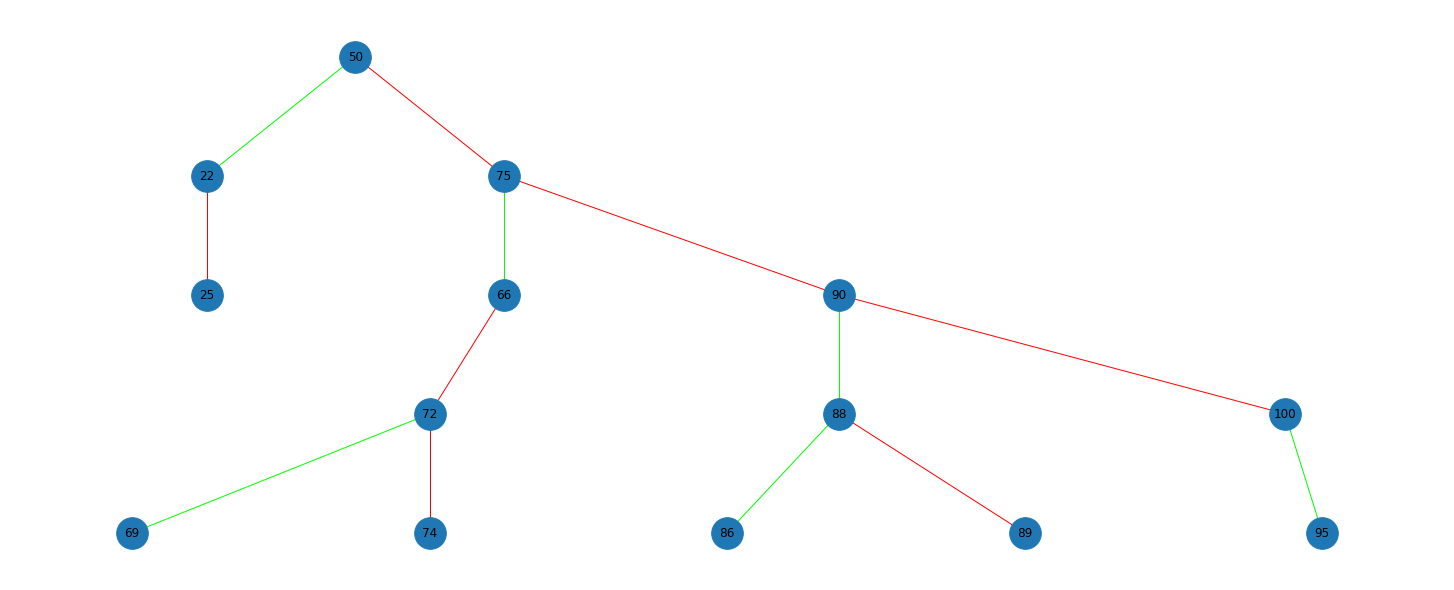

In [22]:
print_tree(binary_tree)

# Building a Binary Tree from a preorder list

In [7]:
def build_binary_search_tree(preorder):
  if preorder:
    key = preorder[0]
    node = Node(key)
    left_values = [value for value in preorder if value < key]
    right_values = [value for value in preorder if value > key]
    node.left_node = build_binary_search_tree(left_values)
    node.right_node = build_binary_search_tree(right_values)
    return node

In [8]:
binary_tree = build_binary_search_tree([10, 5, 1, 7, 40, 50])

<ipython-input-3-360298d1e13d>:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


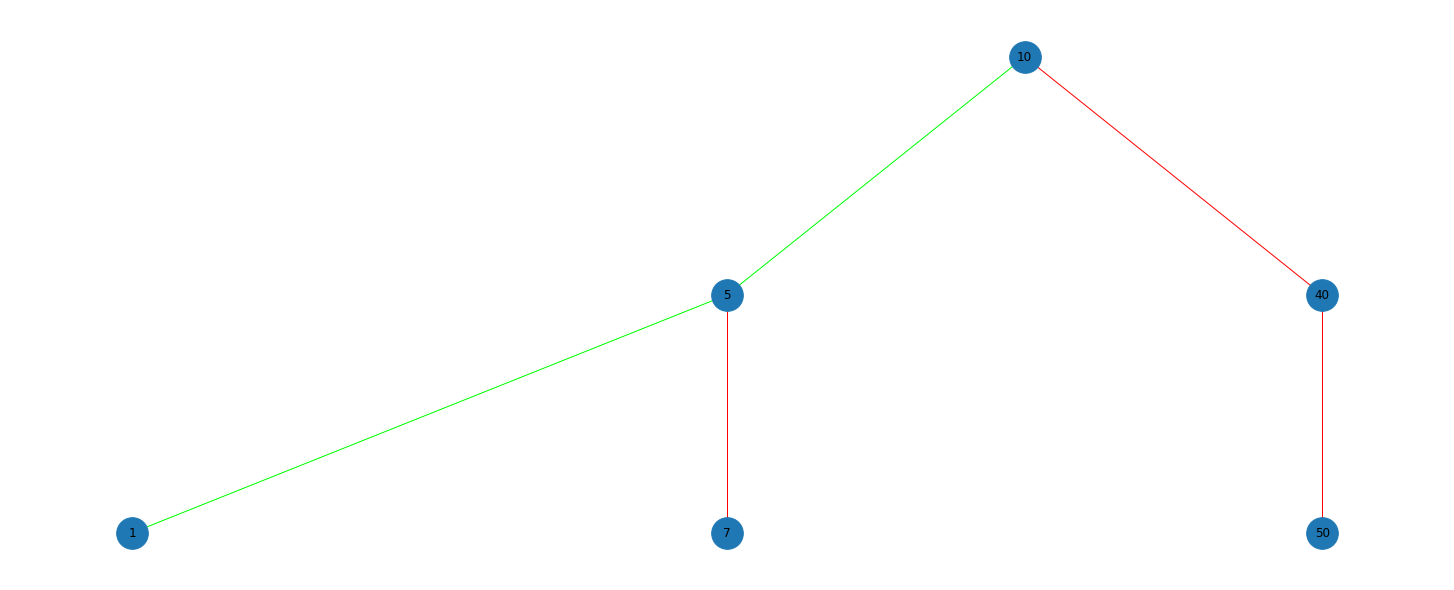

In [9]:
print_tree(binary_tree)

# Converting a Binary Tree to a Binary Search Tree

In [10]:
def get_values(tree):
  """ Get all the values of the tree """
  if tree:
    yield int(tree.key)
    yield from get_values(tree.left_node)
    yield from get_values(tree.right_node)

def create_node_with_ordered_list(ordered_values):
  """ Creates a node with ordered list, returning the node and two sublists with values lesser and greater than the node respectively """
  if ordered_values:
    median = (len(ordered_values) // 2) 
    return Node(ordered_values[median]), ordered_values[:median], ordered_values[median + 1:]

def set_subnode(root, ordered_values, side):
  """ Set the subnode attributes such as key value and left/right subnode values """
  if ordered_values:
    subnode, less_than_list, greater_than_list = create_node_with_ordered_list(ordered_values)
    setattr(root, side, subnode)
    create_subnodes_with_ordered_lists(subnode, less_than_list, greater_than_list)

def create_subnodes_with_ordered_lists(root, left_ordered_values, right_ordered_values):
  """ Request the setting of left / right subnodes """
  set_subnode(root, left_ordered_values, 'left_node')
  set_subnode(root, right_ordered_values, 'right_node')

def convert_to_binary_search_tree(tree):
  """ Convert a binary tree to a binary search tree """
  ordered_values = sorted(list(get_values(tree)))
  if ordered_values:
    root, less_than_list, greater_than_list = create_node_with_ordered_list(ordered_values)

    create_subnodes_with_ordered_lists(root, less_than_list, greater_than_list)
    return root


In [11]:
build_binary_tree = BuildBinaryTree()
binary_tree = build_binary_tree.build_tree('50 22 75 25 N 66 90 N N N 72 88 100 69 74 86 89 95 N')

In [12]:
binary_search_tree = convert_to_binary_search_tree(binary_tree)

<ipython-input-3-360298d1e13d>:12: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog='dot')


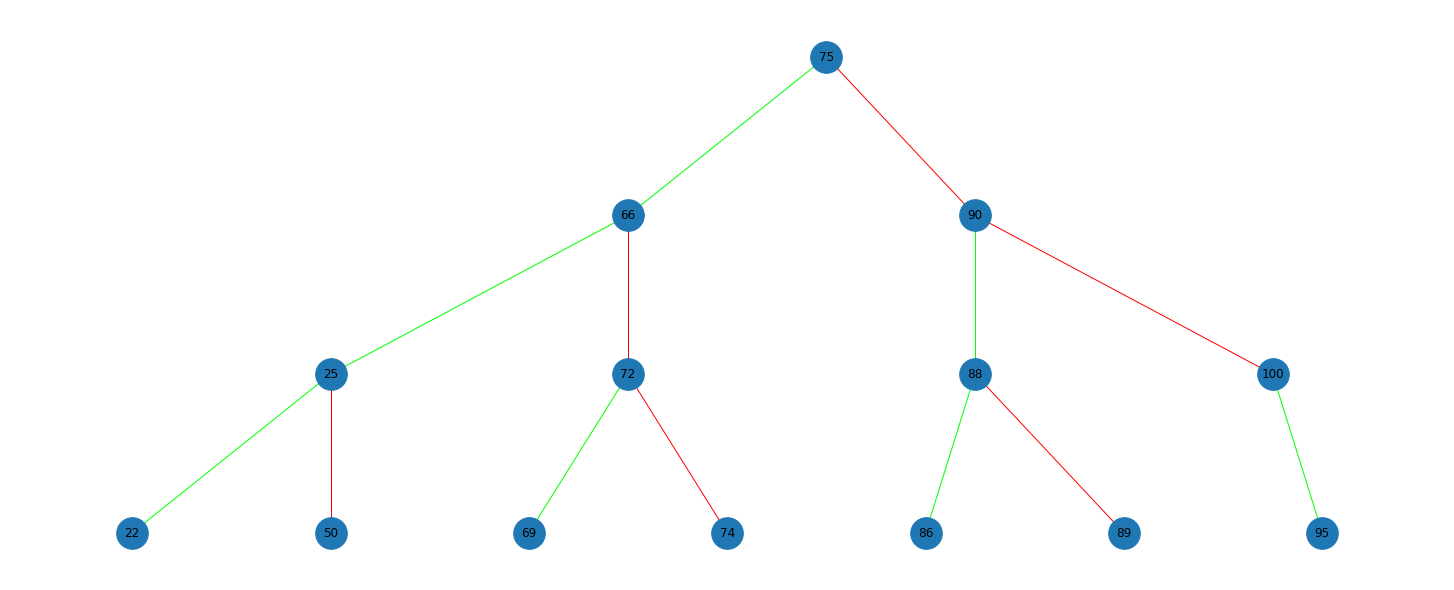

In [13]:
print_tree(binary_search_tree)

# Building all possible BST with a sequence from 1 to N

## BST number with a sequence from 1 to N

In [14]:
def calculate_sub_tree_number(list_of_values):
  if len(list_of_values) == 1:
    return 1

  sum_sub_trees = 0 
  for i in range(len(list_of_values)):
    left_number, right_number = 1, 1
    if list_of_values[:i]:
      left_number = calculate_sub_tree_number(list_of_values[:i])
    if list_of_values[i + 1:]:
      right_number = calculate_sub_tree_number(list_of_values[i + 1:])
    sum_sub_trees += (left_number * right_number)
  
  return sum_sub_trees

def calculate_bst_number(n):
  if n < 1:
    return 0

  list_of_values = list(range(1, n + 1))
  return calculate_sub_tree_number(list_of_values)

  

In [15]:
calculate_bst_number(4)

14

## Building all possible BST

In [16]:
from copy import deepcopy

In [17]:
def building_trees(list_of_values):
  if len(list_of_values) == 1:
    return [Node(list_of_values[0]), ]

  list_of_subtrees = []
  for i, value in enumerate(list_of_values):
    root = Node(value)
    left_subtrees, right_subtrees = [None, ], [None, ]
    if list_of_values[:i]:
      left_subtrees = building_trees(list_of_values[:i])
    if list_of_values[i + 1:]:
      right_subtrees = building_trees(list_of_values[i + 1:])

    for left_subtree in left_subtrees:
      root.left_node = left_subtree
      for right_subtree in right_subtrees:
        root.right_node = right_subtree
        list_of_subtrees.append(deepcopy(root))
  
  return list_of_subtrees

def building_all_possible_bst(n):
  if n < 1:
    return 0

  list_of_values = list(range(1, n + 1))
  return building_trees(list_of_values)

In [18]:
def preorder(root):
  if root:
    print(root.key, end= ", ")
    preorder(root.left_node)
    preorder(root.right_node)

In [19]:
list_of_trees = building_all_possible_bst(4)
print(len(list_of_trees))
for tree in list_of_trees:
  print("Preorder Tree: [", end="")
  preorder(tree)
  print("]")

14
Preorder Tree: [1, 2, 3, 4, ]
Preorder Tree: [1, 2, 4, 3, ]
Preorder Tree: [1, 3, 2, 4, ]
Preorder Tree: [1, 4, 2, 3, ]
Preorder Tree: [1, 4, 3, 2, ]
Preorder Tree: [2, 1, 3, 4, ]
Preorder Tree: [2, 1, 4, 3, ]
Preorder Tree: [3, 1, 2, 4, ]
Preorder Tree: [3, 2, 1, 4, ]
Preorder Tree: [4, 1, 2, 3, ]
Preorder Tree: [4, 1, 3, 2, ]
Preorder Tree: [4, 2, 1, 3, ]
Preorder Tree: [4, 3, 1, 2, ]
Preorder Tree: [4, 3, 2, 1, ]


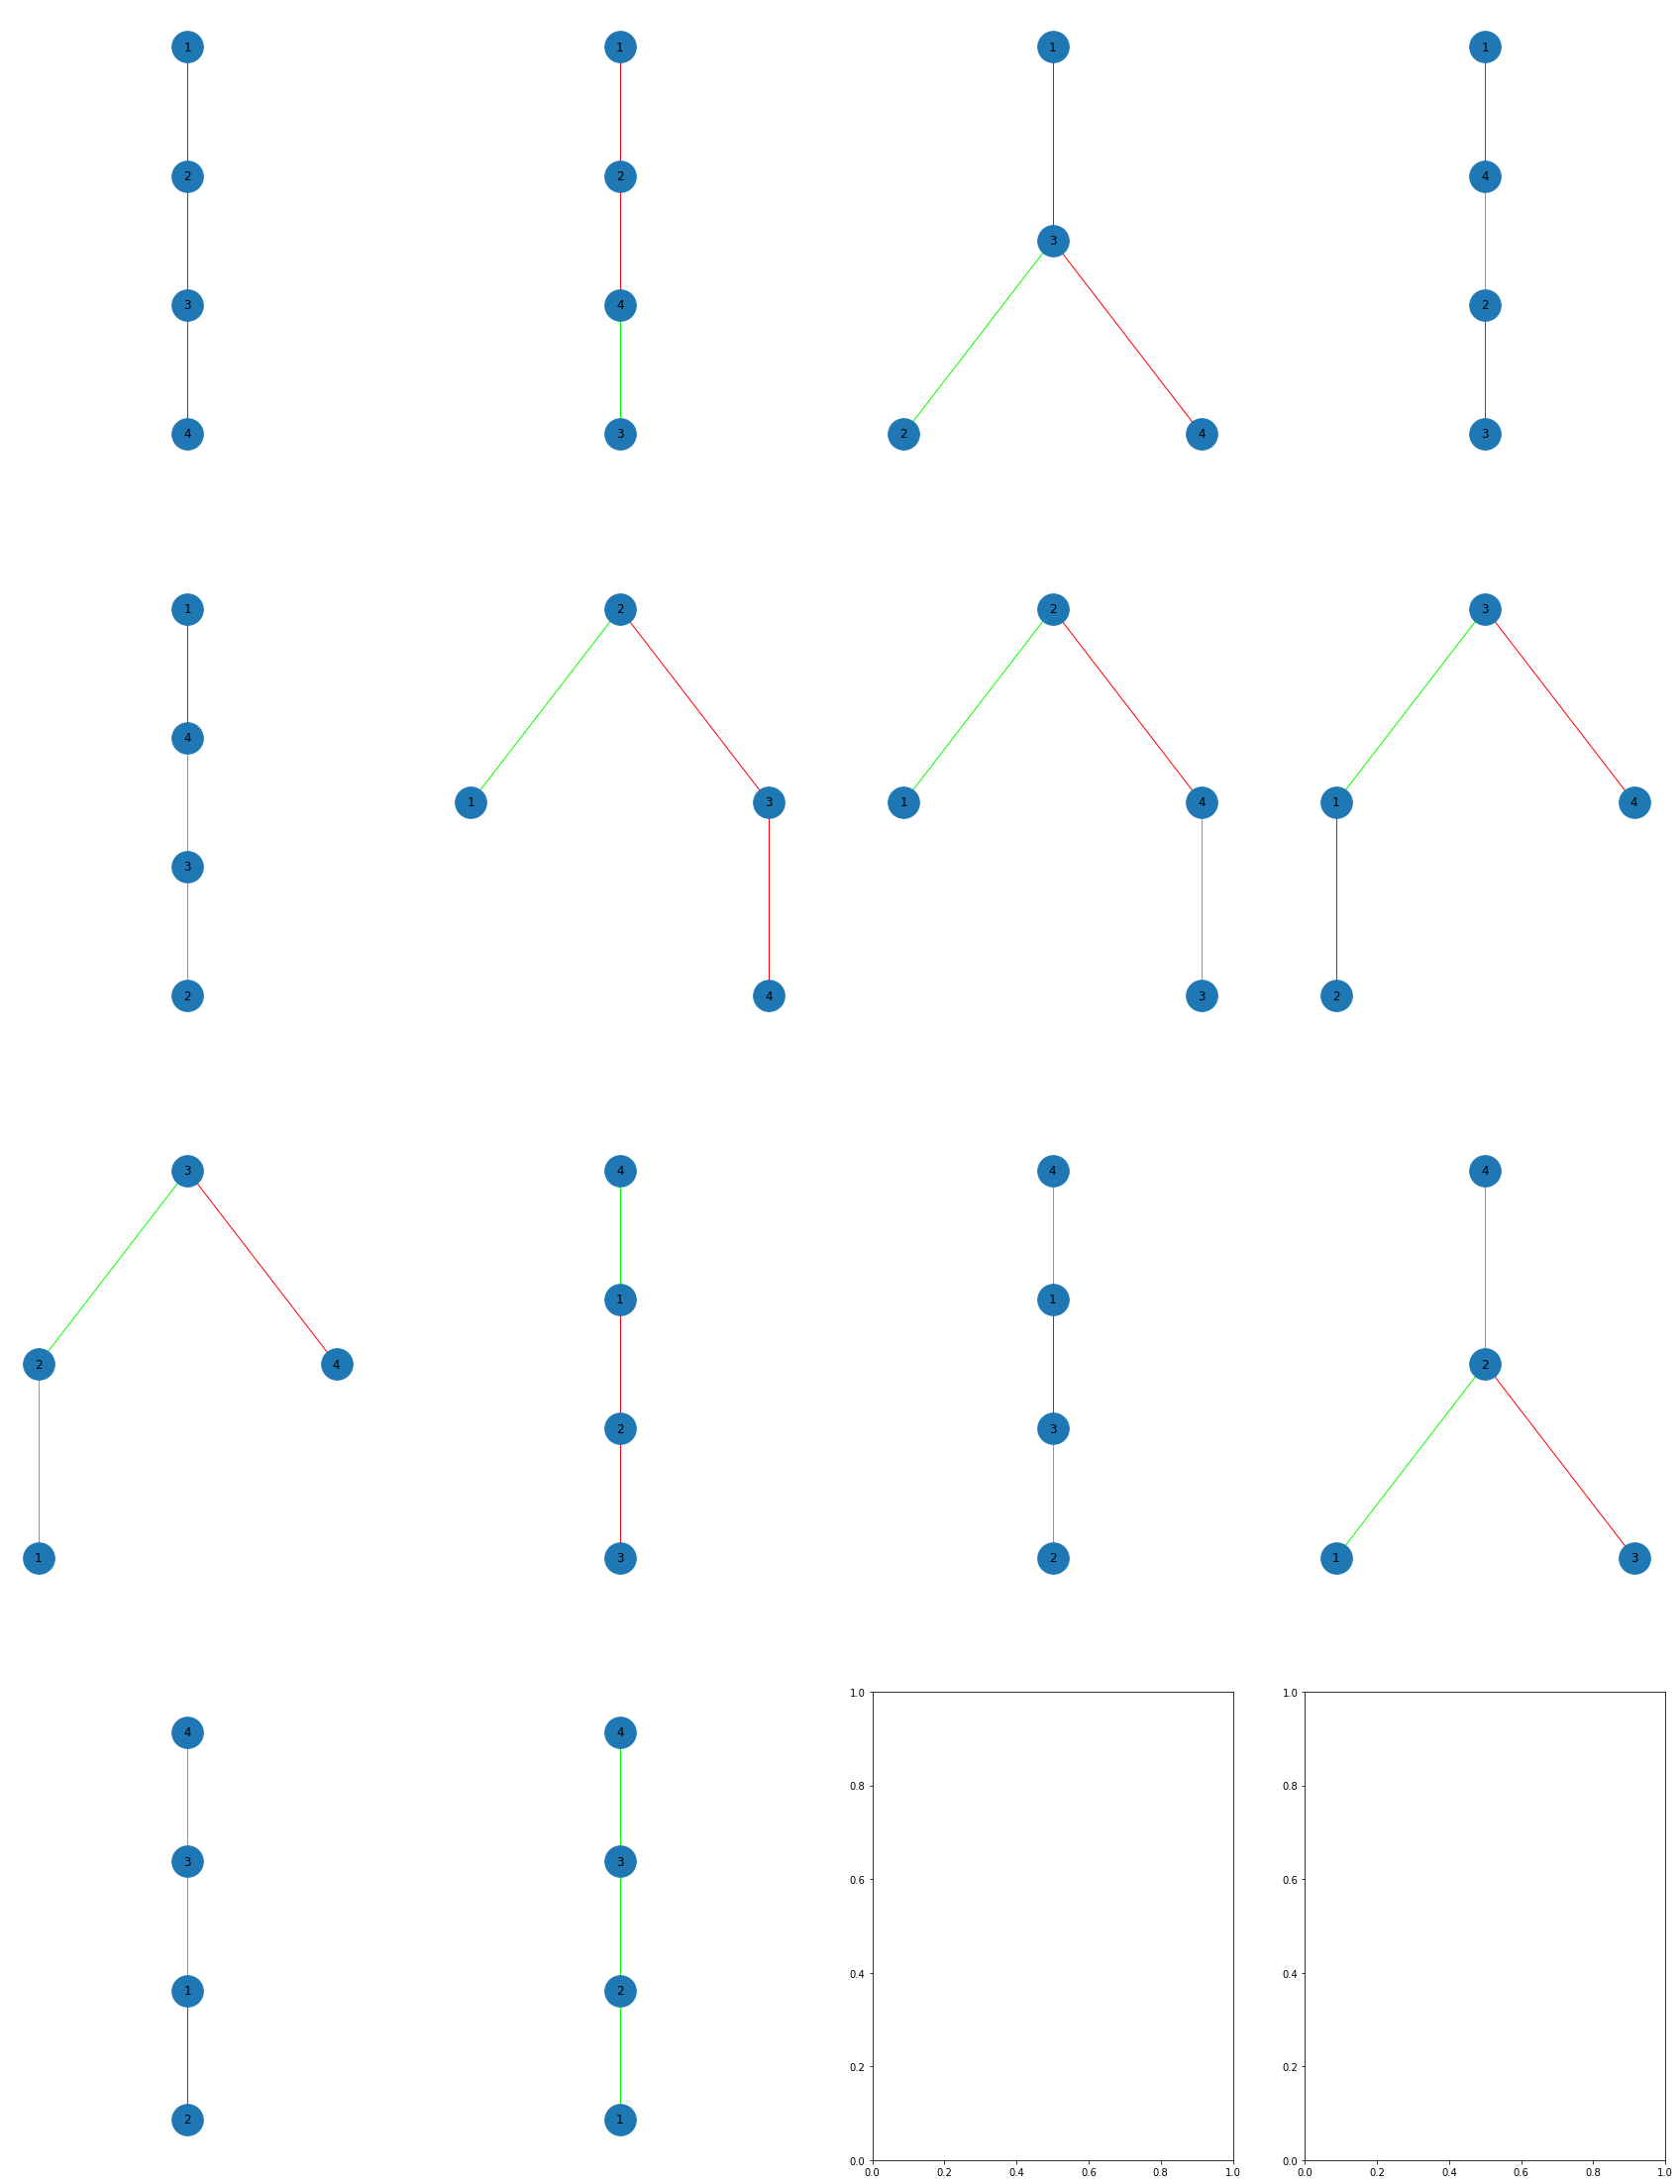

In [20]:
import warnings
from math import ceil
warnings.filterwarnings("ignore")

def print_node(root, prev=None, color=None):
  if root:
    G.add_node(root.key)
    if prev:
      G.add_edge(prev, root.key, color=color)
    print_node(root.left_node, root.key, '#00FF00')
    print_node(root.right_node, root.key, '#FF0000')

row_number = ceil(len(list_of_trees) / 4)
fig, axs = plt.subplots(row_number , 4)
fig.set_figheight(row_number * 10)
fig.set_figwidth(30)
i, j = 0, 0
for tree in list_of_trees:
  G = nx.Graph()
  print_node(tree)
  pos = graphviz_layout(G, prog='dot')
  colors = [G[u][v]['color'] for u,v in G.edges()]
  nx.draw(G, pos, with_labels=True, node_size=1000, edge_color=colors, ax=axs[i, j])

  j += 1
  if j == 4:
    j = 0
    i += 1

plt.show()

# BST to Min Heap

In [31]:
def inorder(root):
  if root:
    yield from inorder(root.left_node)
    yield root.key
    yield from inorder(root.right_node)

def bst_to_min_heap(bst):
  inorder_list = list(inorder(bst))
  if len(inorder_list) % 2 == 0:
    inorder_list.append('N')
  inorder_string = ' '.join(inorder_list)
  return build_binary_tree.build_tree(inorder_string)


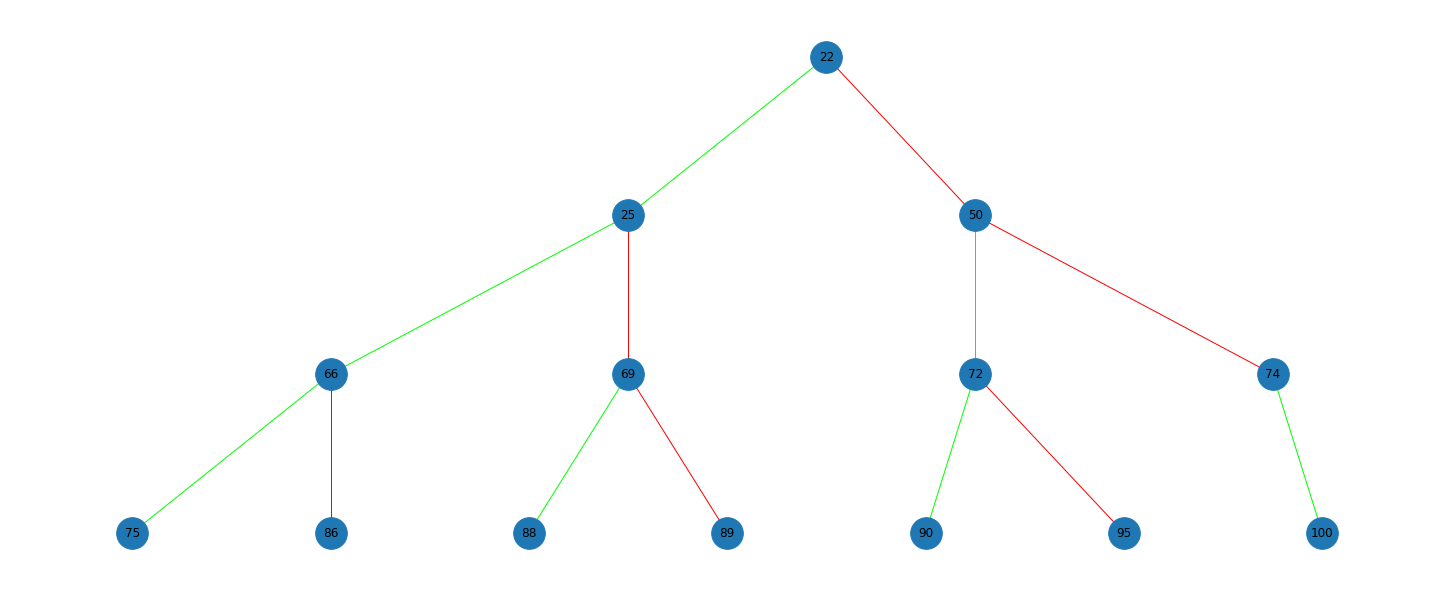

In [32]:
bst = build_binary_tree.build_tree('50 22 75 N 25 66 90 N N N 72 88 100 69 74 86 89 95 N')
min_heap = bst_to_min_heap(bst)
print_tree(min_heap)